# Getting some style: fantasy maps

Our objective today: make a stylized map of Middle Earth that's similar to those in the front pages of the books.
I saw [this map of Middle Earth](https://www.r-bloggers.com/interactive-and-styled-middle-earth-map/) made with R, and being a Python supremicist, felt that the gauntlet had been thrown down.

First, let's check out what we've got using Geopandas.

In [1]:
import geopandas
import numpy as np
import fiona
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

I'm keeping the repository in a separate folder dedicated to datasets, but you can clone the repository at https://github.com/jvangeld/ME-GIS.

In [2]:
coasts =  geopandas.read_file('../../datamancery/geo/ME-GIS-master/Coastline2.shp')
cities =  geopandas.read_file('../../datamancery/geo/ME-GIS-master/Cities.shp')
forests = geopandas.read_file('../../datamancery/geo/ME-GIS-master/Forests.shp')
towns =   geopandas.read_file('../../datamancery/geo/ME-GIS-master/Towns.shp')
lakes =   geopandas.read_file('../../datamancery/geo/ME-GIS-master/Lakes2.shp')

In [3]:
cities.sample(5)

,GM_LAYER,GM_TYPE,LAYER,Name,geometry
17,City,City,City,Dol Guldur,POINT (1071013.730837432 929616.5865869542)
6,City,City,City,Helm's Deep,POINT (805414.8713741328 748074.0261582941)
16,City,City,City,Dol Amroth,POINT (981313.841584124 529840.7410166308)
22,City,City,City,Morannon,POINT (1180634.357018766 720624.526880509)
5,City,City,City,Tharbad,POINT (656349.9260703687 901067.9533841792)


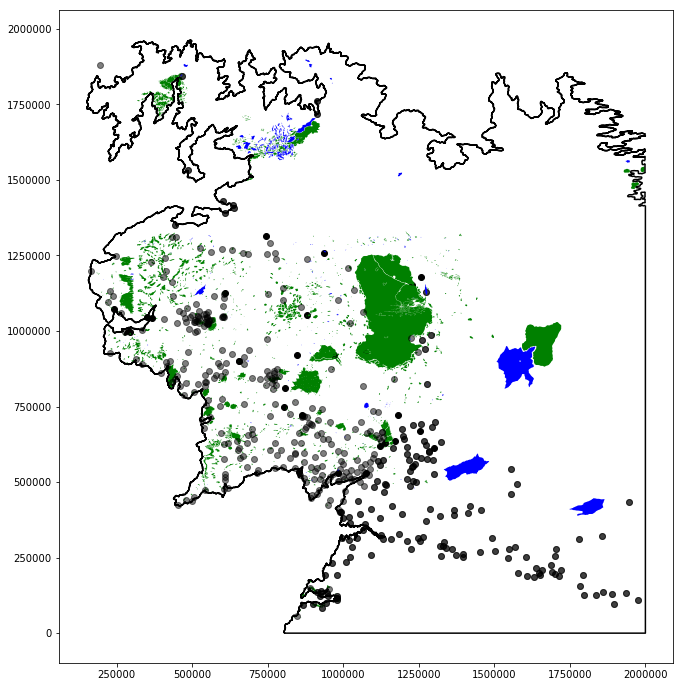

In [4]:
base = coasts.plot(color="black", figsize=(12,12))
cities.plot(ax=base, color="black")
forests.plot(ax=base, color="green")
towns.plot(ax=base, color="black", alpha=0.5)
lakes.plot(ax=base, color="blue")
base

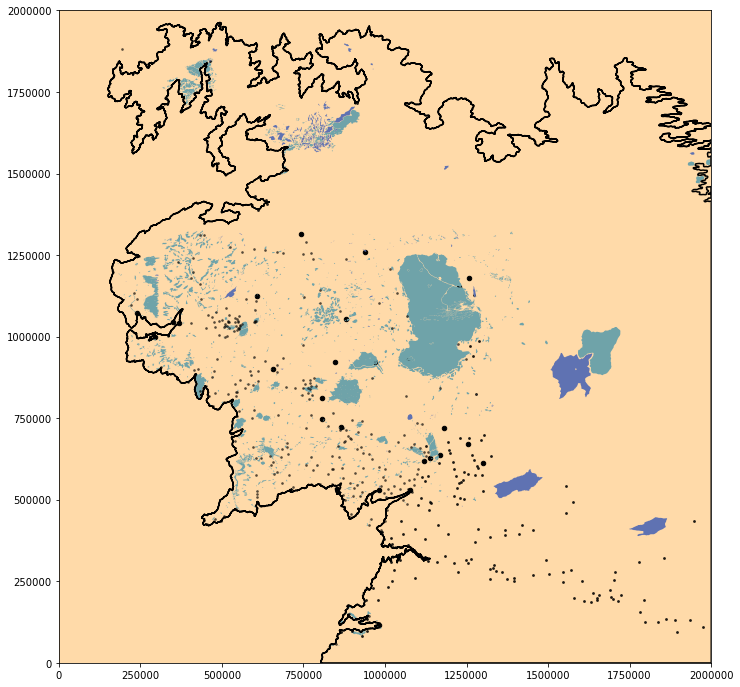

In [5]:
base = coasts.plot(color="black", figsize=(12,12))
base.patch.set_facecolor('#ffdaa9')
cities.plot(ax=base, color="black", markersize=20)
forests.plot(ax=base, color="#6fa3a9")
towns.plot(ax=base, color="black", alpha=0.5, markersize=3)
lakes.plot(ax=base, color="#5f72b2")
plt.xlim([25, 2000000])
plt.ylim([25, 2000000])
base
# plt.show()

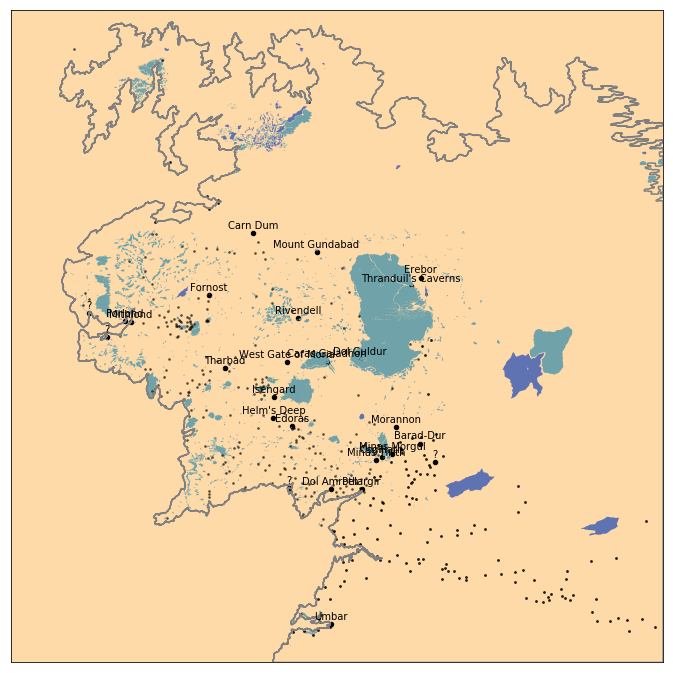

In [ ]:
base = coasts.plot(color="grey", figsize=(12,12))
base.patch.set_facecolor('#ffdaa9')
cities.plot(ax=base, color="black", markersize=20)
forests.plot(ax=base, color="#6fa3a9")
towns.plot(ax=base, color="black", alpha=0.5, markersize=3)
lakes.plot(ax=base, color="#5f72b2")
plt.xlim([50, 2000000])
plt.ylim([50, 2000000])
for idx, row in cities.iterrows():
    name = row.Name if row.Name else '?'
    text_coords = [arr.tolist()[0] for arr in row.geometry.xy]
    text_coords[1] += 15000
    plt.annotate(s=name, xy=text_coords, horizontalalignment='center', size="medium")
base.xaxis.set_visible(False)
base.yaxis.set_visible(False)
# plt.savefig('middle_earth.png')
# plt.show()
base

In [ ]:
base = coasts.plot(color="grey", figsize=(12,12))
base.patch.set_facecolor('#F8ECC2')
cities.plot(ax=base, color="black", markersize=20)
forests.plot(ax=base, color="#6fa3a9")
towns.plot(ax=base, color="black", alpha=0.5, markersize=3)
lakes.plot(ax=base, color="#5f72b2")
plt.xlim([50, 2000000])
plt.ylim([50, 2200000])
for idx, row in cities.iterrows():
    name = row.Name if row.Name else '?'
    text_coords = [arr.tolist()[0] for arr in row.geometry.xy]
    text_coords[1] += 15000
    plt.annotate(s=name, xy=text_coords, horizontalalignment='center', size="medium", family="serif")
base.xaxis.set_visible(False)
base.yaxis.set_visible(False)
base.text(800000, 2100000, "Middle Earth", size="xx-large", family="serif")
base

### Finding the available fonts

In [ ]:
import matplotlib
font_manager = matplotlib.font_manager.FontManager()
available_fonts = [font.name for font in font_manager.ttflist]
fig = plt.figure()
ax = fig.add_subplot(111) # two rows, one column, first plot
ax.axis('off')

xi = 0
yi = 0
y_inc = 0.08
x_inc = y_inc * 5
for name in available_fonts[:1000]:
    ax.text(xi, yi, name, family=name, size=13)
    xi += x_inc
    if xi > x_inc * 8:
        xi = 0
        yi += y_inc
    if yi > y_inc * 50:
        print("overflowing for {}".format(name))
        break
base

In [ ]:
base = coasts.plot(color="grey", figsize=(18,18))
base.patch.set_facecolor('#F8ECC2')
cities.plot(ax=base, color="black", markersize=20)
forests.plot(ax=base, color="#6fa3a9")
towns.plot(ax=base, color="black", alpha=0.5, markersize=3)
lakes.plot(ax=base, color="#5f72b2")
plt.xlim([50, 1600000])
plt.ylim([50, 2200000])
for idx, row in cities.iterrows():
    name = row.Name if row.Name else '?'
    text_coords = [arr.tolist()[0] for arr in row.geometry.xy]
    text_coords[1] += 15000
    plt.annotate(s=name, xy=text_coords, horizontalalignment='center', size=18, family="Gabriola")
base.xaxis.set_visible(False)
base.yaxis.set_visible(False)
base.text(650000, 2100000, "Middle Earth", size=45, family="Gabriola")
base

### Stochastic, single-axis automatic label layout

In [ ]:
cities['text_y'] = cities.geometry.map(lambda point: point.y + 1500)
cities[["Name", "text_y"]].sort_values(by="text_y")
labels_close = cities.text_y.diff() < 25000
while labels_close.sum() > 10:
    print(labels_close.sum(), end=" ")
    for i in range(len(cities)):
        if labels_close[i]:
            mult = np.random.random() - 0.5
            if abs(cities.loc[i, ("text_y")] - cities.loc[i].geometry.y) < 200000:
                cities.loc[i, ("text_y")] += 20000 * mult
            else:
                cities.loc[i, ("text_y")] = (cities.loc[i].geometry.y + cities.loc[i, ("text_y")]) / 2
                
    labels_close = cities.text_y.diff() < 25000

In [ ]:
base = coasts.plot(color="grey", figsize=(18,18))
base.patch.set_facecolor('#F8ECC2')
cities.plot(ax=base, color="black", markersize=20)
forests.plot(ax=base, color="#6fa3a9")
towns.plot(ax=base, color="black", alpha=0.5, markersize=3)
lakes.plot(ax=base, color="#5f72b2")
plt.xlim([50, 2000000])
plt.ylim([50, 2200000])
for idx, row in cities.iterrows():
    name = row.Name if row.Name else '?'
    text_coords = [row.geometry.x, row.text_y]
    plt.annotate(s=name, xy=text_coords, horizontalalignment='center', size=20, family="Gabriola")
base.xaxis.set_visible(False)
base.yaxis.set_visible(False)
base.text(800000, 2100000, "Middle Earth", size=45, family="Gabriola")
base